In [0]:
#import libraries
import os,cv2, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#mount google drive content
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#get file path for training and test data
TRAIN_DIR = '/content/drive/My Drive/Colab Notebooks/Machine Learning/training_data/'
TEST_DIR= '/content/drive/My Drive/Colab Notebooks/Machine Learning/test_data/'

#specify the number of ros, columns and channels for the CNN
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
#get all the images from training_data and test_data using list comprehension
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]


In [0]:
#function to read images from the path
def read_image(file_path):
    img = cv2.imread(file_path,cv2.IMREAD_COLOR)
    return cv2.resize(img,(ROWS,COLS), interpolation = cv2.INTER_CUBIC)


In [0]:
#function to prepare and process the images read from file path
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
 
  #create an array of X and y in order to be in a format for Linear Regression Model
  X = np.ndarray((n_x,m), dtype = np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images):
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower():
      y[0,i] = 1
    else:
      y[0,i] = 0
      
    if i%10 == 0:
      print('proceed {} of {}'.format(i,m))
      
  return X,y
      
      

In [0]:
#split training and test data
X_train, y_train = prep_data(train_images)
X_test,test_idx = prep_data(test_images)


X.shape is (12288, 50)
proceed 0 of 50
proceed 10 of 50
proceed 20 of 50
proceed 30 of 50
proceed 40 of 50
X.shape is (12288, 49)
proceed 0 of 49
proceed 10 of 49
proceed 20 of 49
proceed 30 of 49
proceed 40 of 49


In [0]:
classes = {0:'Normal Image',
          1:'Plate Number Image'}

In [0]:
def show_images(X,y,idx):
  image = X[idx]
  image = image.reshape((ROWS,COLS,CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title('This is a {}'.format(classes[y[idx,0]]))
  plt.show()

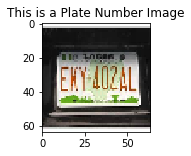

In [0]:
show_images(X_train.T,y_train.T, 2)

In [0]:
from sklearn.linear_model import LogisticRegressionCV

In [0]:
model = LogisticRegressionCV()


In [0]:
X_train_lr, y_train_lr = X_train.T,y_train.T.ravel() 

In [0]:
model.fit(X_train_lr,y_train_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
print('Model accuracy: {:.2f}%'.format(model.score(X_train_lr,y_train_lr)*100))

Model accuracy: 100.00%


In [0]:
def show_image_prediction(X,idx,clf):
  image = X[idx].reshape(1,-1)
  image_class = classes[clf.predict(image).item()]
  image = image.reshape((ROWS,COLS,CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx,image_class))
  plt.show()

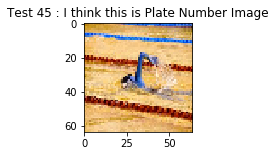

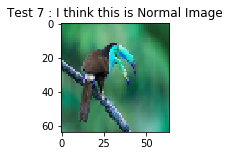

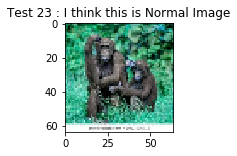

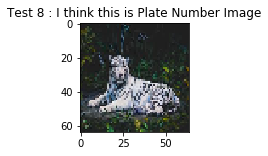

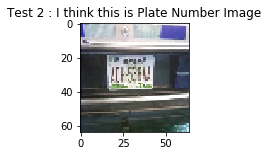

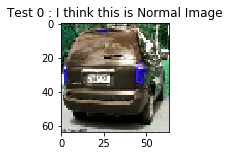

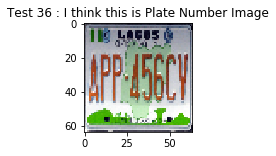

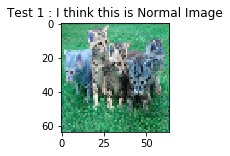

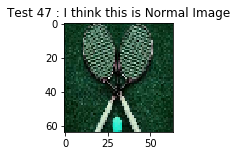

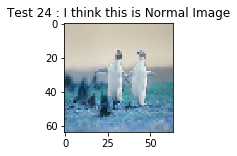

In [0]:
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 10):
  show_image_prediction(X_test_lr, i, model)

In [0]:
#X_test.shape

(12288, 50)